In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
from sklearn.metrics import confusion_matrix

In [3]:
import seaborn as sns
np.random.seed(0)

In [4]:
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255 
x_test = x_test/255

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


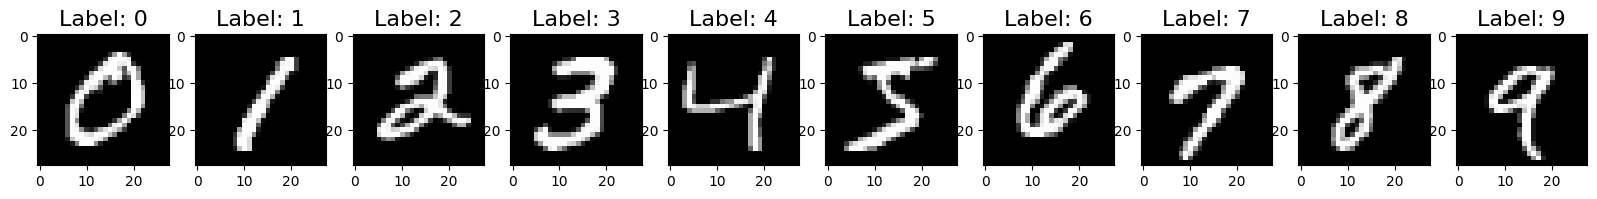

In [6]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20, 20))
for i in range(0, num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title("Label: {}".format(i),fontsize=16)

In [7]:
model_lr = tf.keras.models.Sequential([
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])
model_lr.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lr.summary()
y_onehot_train = tf.one_hot(y_train, 10)
model_lr.fit(x_train, y_onehot_train)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8093 - loss: 0.7275


In [8]:
model_lr = tf.keras.models.Sequential([
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])
model_lr.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_lr.summary()
model_lr.fit(x_train, y_train) #sparse >> onehot transformation not needed

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8107 - loss: 0.7256


In [9]:
history_lr = model_lr.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=False)

In [10]:
test_loss, test_acc = model_lr.evaluate(x_test, y_test)
print("Test Loss: {},Test Accuracy: {}".format(test_loss, test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9168 - loss: 0.3004
Test Loss: 0.26475203037261963,Test Accuracy: 0.9276000261306763


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[7.6678089e-06 7.2911621e-11 1.6407532e-05 4.1234260e-03 5.3928750e-07
 2.8853077e-05 5.7035043e-10 9.9538428e-01 2.1540902e-05 4.1727873e-04]  =>  7


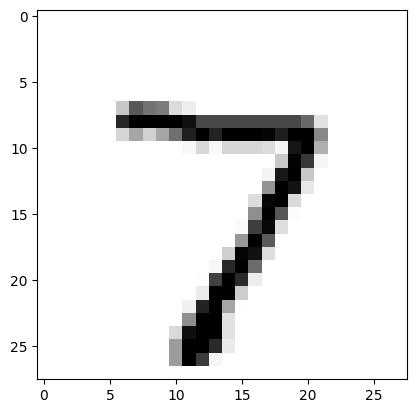

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
[5.3402921e-04 1.8587342e-06 9.9144697e-01 5.2853994e-04 3.0136657e-13
 2.5268400e-03 4.8574000e-03 6.6442111e-16 1.0448283e-04 3.8437318e-12]  =>  2


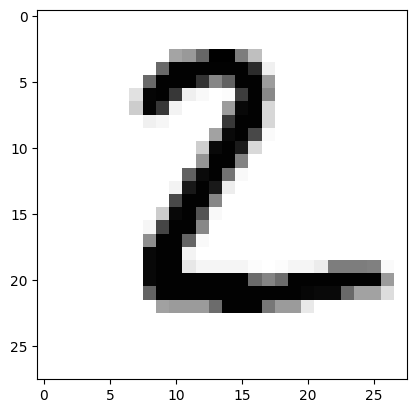

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[4.3245600e-06 9.7130322e-01 1.4532531e-02 3.4655579e-03 1.9695571e-04
 1.1461410e-03 1.6388731e-03 1.9879949e-03 5.2916468e-03 4.3270626e-04]  =>  1


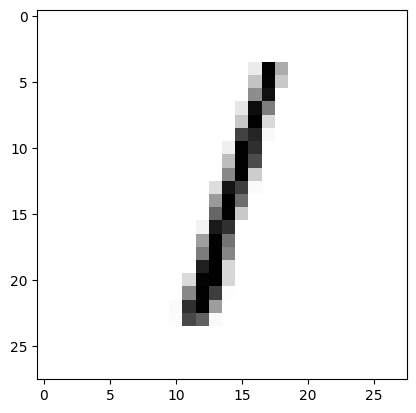

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[9.9967957e-01 1.5222927e-11 1.0210348e-04 3.2348585e-06 3.0950098e-08
 7.4588526e-05 9.4316885e-05 1.1374526e-05 1.9057796e-05 1.5770007e-05]  =>  0


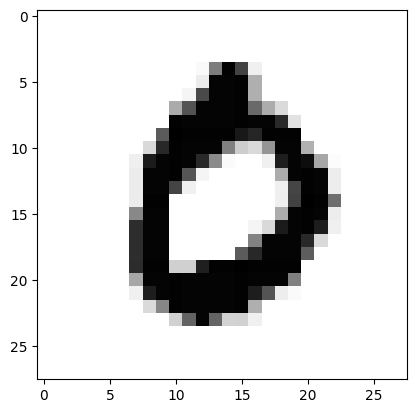

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
[5.1555055e-04 3.9081760e-07 2.3645791e-03 5.0651295e-05 9.6286446e-01
 1.5497585e-04 1.7482707e-03 3.3016999e-03 4.1007306e-03 2.4898682e-02]  =>  4


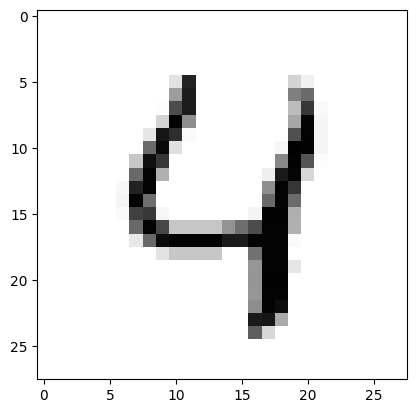

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


In [12]:
probabilities = model_lr.predict(x_test[:5])
predictions = np.argmax(probabilities, axis=1)
for i in range(5):
    print(probabilities[i], " => ", predictions[i])
    plt.imshow(x_test[i], cmap="Greys")
    plt.show()
    model_lr.predict(x_test[18].reshape(1,28,28))

In [54]:
model_mlp = tf.keras.models.Sequential([
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(64, activation='elu'),
        layers.Dense(64, activation='elu'),
        layers.Dense(10, activation='softmax')
    ])
model_mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_mlp.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
history_mlp = model_mlp.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=False)

In [57]:
y_pred = model_lr.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step


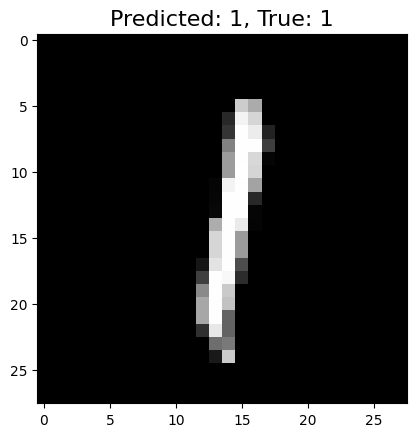

In [61]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_sample_true = y_test[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


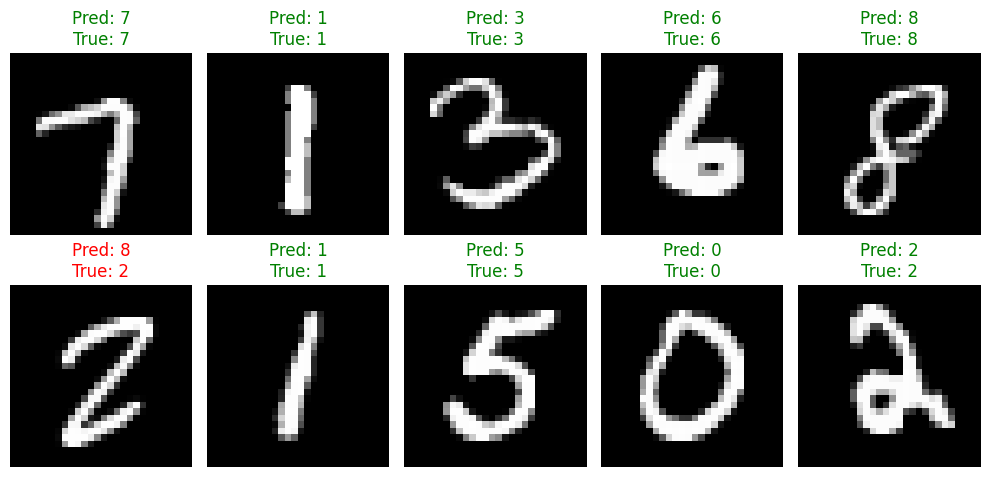

In [14]:
num_samples = 10

rows = 2
cols = num_samples // rows

y_pred = model_lr.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

fig, axes = plt.subplots(rows, cols, figsize=(10, 5))

for i in range(num_samples):
    random_idx = np.random.choice(len(x_test))

    x_sample = x_test[random_idx]
    y_sample_true = y_test[random_idx]
    y_sample_pred_class = y_pred_classes[random_idx]

    correct = y_sample_pred_class == y_sample_true

    ax = axes[i // cols, i % cols]
    ax.imshow(x_sample.reshape(28, 28), cmap='gray')  
    ax.set_title(f"Pred: {y_sample_pred_class}\nTrue: {y_sample_true}", color="green" if correct else "red")
    ax.axis('off')

plt.tight_layout()
plt.show()